In [1]:
## loading the dataset

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('heart_disease.csv')

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [13]:

df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [15]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [17]:
##  Exploratory Data Analysis (EDA)

In [19]:
# to handle the missing values

In [21]:
from sklearn.impute import SimpleImputer

In [41]:
# Separate categorical and numerical columns
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [43]:
cat_col

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [45]:
num_col

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')

In [51]:
imputer=SimpleImputer(strategy='mean')  # Create an imputer object

In [53]:
imputer


SimpleImputer()

In [59]:
# Fill missing values in numerical columns with mean
df[num_col] = imputer.fit_transform(df[num_col])

In [61]:
df[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63.0,145.0,233.0,1.0,150.0,2.300000,0.0
1,41.0,135.0,203.0,0.0,132.0,0.000000,0.0
2,57.0,140.0,192.0,0.0,148.0,0.400000,0.0
3,52.0,118.0,186.0,0.0,190.0,0.000000,0.0
4,57.0,110.0,201.0,0.0,126.0,1.500000,0.0
...,...,...,...,...,...,...,...
903,53.0,125.0,0.0,0.0,120.0,1.500000,4.0
904,62.0,166.0,170.0,0.0,120.0,3.000000,4.0
905,56.0,170.0,0.0,0.0,123.0,2.500000,4.0
906,56.0,144.0,208.0,1.0,105.0,0.891253,4.0


In [65]:
# Fill missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
df[cat_col] = imputer.fit_transform(df[cat_col])

In [67]:
df[cat_col]

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,normal,FALSE,flat,fixed defect
3,Male,typical angina,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,FALSE,upsloping,normal
904,Male,asymptomatic,st-t abnormality,TRUE,flat,fixed defect
905,Male,non-anginal,lv hypertrophy,TRUE,downsloping,normal
906,Male,non-anginal,st-t abnormality,TURE,downsloping,reversable defect


In [69]:
# Visualize the distribution of numerical features


In [71]:
import matplotlib.pyplot as plt

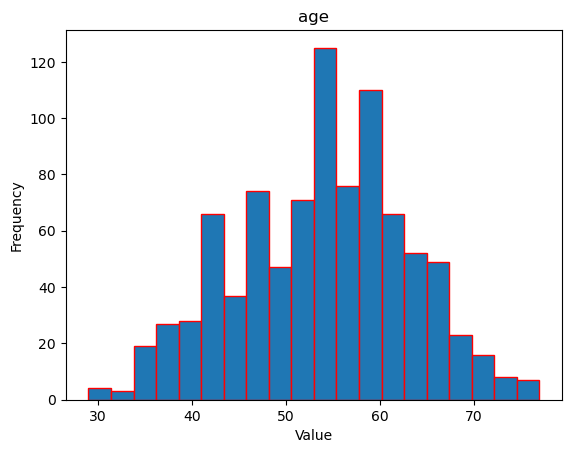

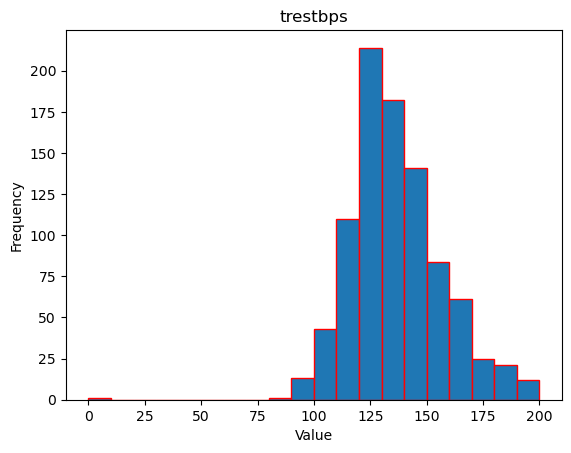

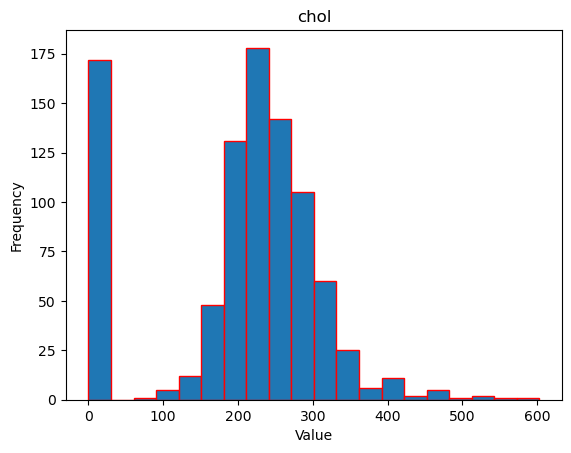

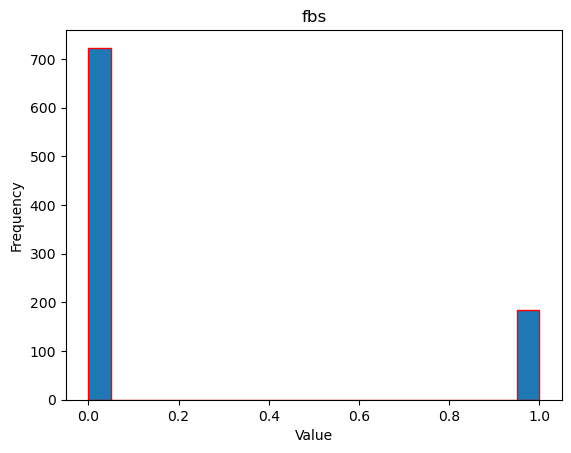

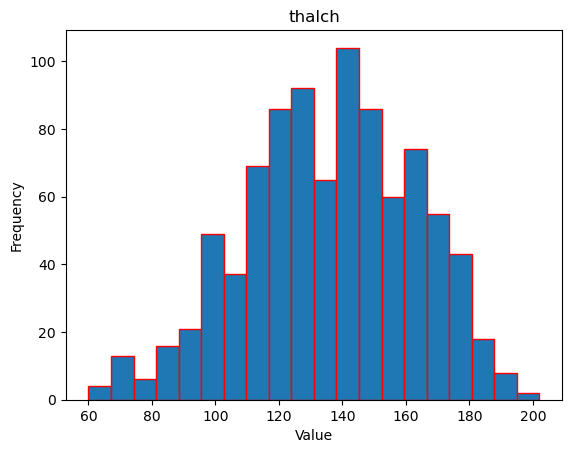

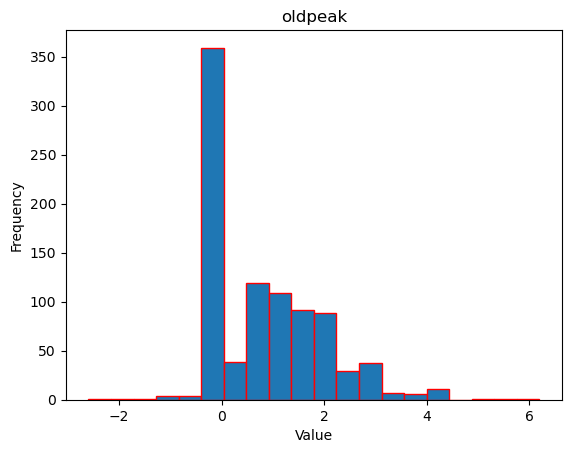

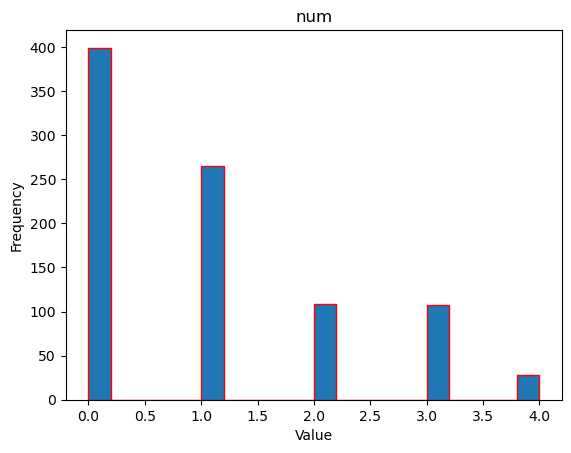

In [77]:
# Plot histograms for numerical columns
for col in num_col:
    plt.hist(df[col], bins=20, edgecolor='red')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [79]:
#Visualize the distribution of categorical features


In [81]:
import seaborn as sns

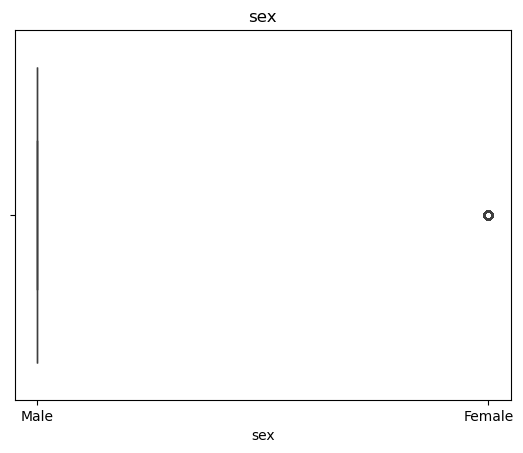

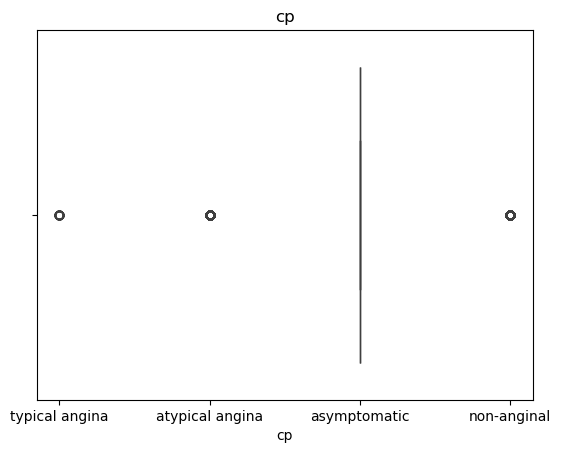

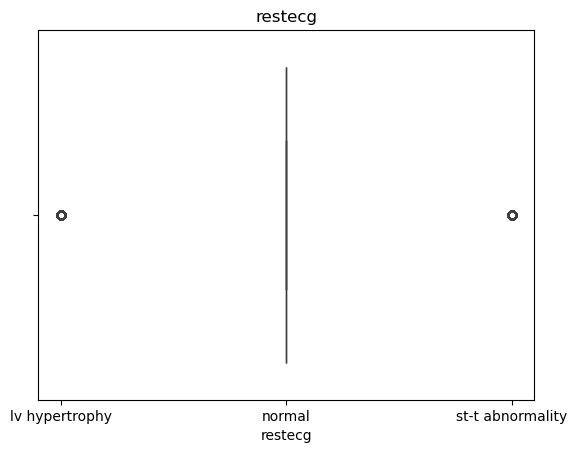

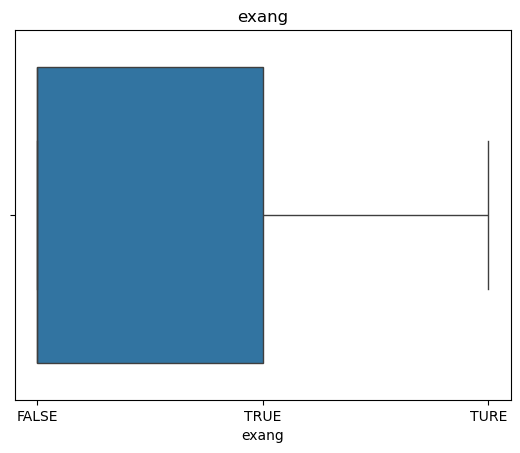

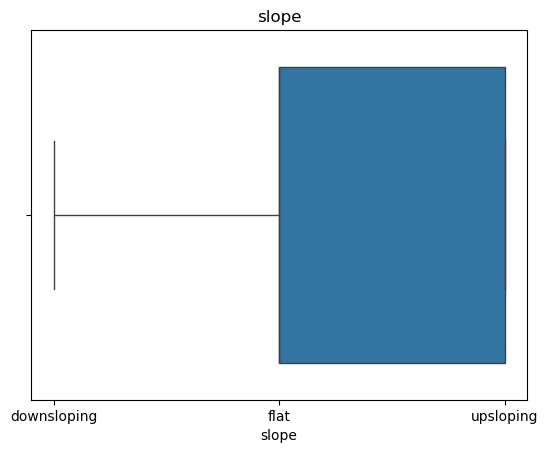

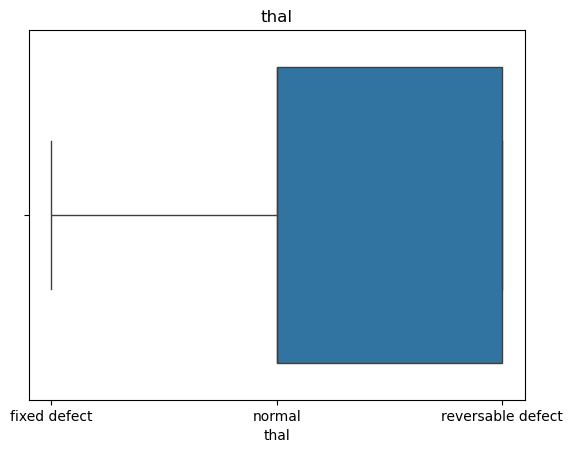

<Figure size 640x480 with 0 Axes>

In [85]:
# Plot box plots for categorical columns
for col in cat_col:
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()
    plt.tight_layout()


In [87]:
 #Visualize the correlation matrix for numerical columns


In [90]:
correlation_matrix = df[num_col].corr()

In [92]:
correlation_matrix

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128728,-0.323058
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000,0.416580
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416580,1.000000


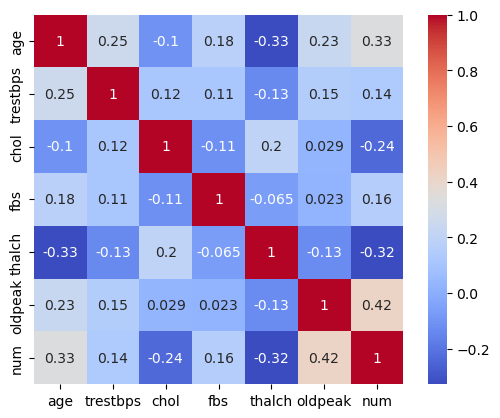

In [94]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [96]:
#Feature Engineering

In [98]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [100]:
LE=LabelEncoder()

In [102]:
LE

LabelEncoder()

In [104]:
# Encode categorical variables

In [106]:
for col in cat_col:
    df[col] = LE.fit_transform(df[col])

In [108]:
df[col]

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    0
905    1
906    2
907    0
Name: thal, Length: 908, dtype: int32

In [114]:
SS=StandardScaler()

In [116]:
SS

StandardScaler()

In [ ]:
# Encode numerical variables

In [122]:
df[num_col] = SS.fit_transform(df[num_col])

In [124]:
df[num_col]

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,1.976894,0.524183,1.334996e+00,-0.881977
1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-8.445938e-01,-0.881977
2,0.350503,0.322181,-0.084656,-0.505844,0.449529,-4.655347e-01,-0.881977
3,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-8.445938e-01,-0.881977
4,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,5.768777e-01,-0.881977
...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,5.768777e-01,2.615119
904,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.998349e+00,2.615119
905,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.524525e+00,2.615119
906,0.241249,0.518352,0.058155,1.976894,-1.155538,-1.052100e-16,2.615119


In [126]:
#Decision Tree Classification

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [130]:
# Convert 'num' to discrete classes because we can apply decision tree classifier to continious target values ((or)) we can apply directly decision tree regressor.
df['num'] = pd.cut(df['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])


In [132]:
df['num']

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: category
Categories (2, int64): [0 < 1]

In [134]:
# Split the dataset into training and testing sets
x = df.drop('num', axis=1)
y = df['num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [136]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,-1.288306,1,1,-0.658674,0.834689,-0.505844,1,0.972109,0,-8.445938e-01,2,1
10,-2.599354,0,3,1.793463,0.316999,-0.505844,2,1.270726,0,-8.445938e-01,0,0
617,2.207820,1,2,0.322181,0.316999,1.976894,1,-1.566136,0,-8.445938e-01,2,2
250,-1.397560,1,0,-1.443359,-1.798388,-0.505844,2,-0.931575,0,-8.445938e-01,1,0
869,-0.523529,1,2,0.175052,-0.530941,-0.505844,1,-2.536642,0,-1.052100e-16,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.006027,0,2,0.076967,0.450885,-0.505844,0,1.345380,0,-8.445938e-01,2,1
270,-1.834576,0,1,-0.658674,0.522290,-0.505844,1,-0.222360,0,-8.445938e-01,0,0
860,-0.632783,1,0,0.322181,1.539818,-0.505844,1,0.860127,1,5.768777e-01,2,1
435,0.350503,1,1,1.008779,0.272371,-0.505844,0,1.046763,0,-8.445938e-01,2,1


In [138]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,1.006027,1,2,-0.168247,-1.798388,-0.505844,2,-0.931575,1,-8.445938e-01,1,0
439,0.459757,1,0,1.793463,-1.798388,1.976894,2,-1.155538,1,-8.445938e-01,0,1
342,-1.397560,1,1,-0.658674,0.798987,-0.505844,2,0.897454,0,-8.445938e-01,0,2
736,0.787519,1,0,0.616437,0.352702,-0.505844,1,0.449529,1,1.998349e+00,0,0
785,0.022741,1,0,-1.149102,0.040303,-0.505844,0,-1.043556,1,-8.445938e-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
580,-0.195767,1,0,0.322181,0.575844,-0.505844,1,-0.073051,1,1.050702e+00,1,0
868,1.224535,1,0,-0.364418,0.986426,-0.505844,0,0.748146,0,-1.052100e-16,0,2
445,-0.086513,1,0,0.322181,0.013526,1.976894,0,0.710819,1,2.093114e+00,0,2
786,0.022741,1,0,-0.560589,0.754358,-0.505844,0,-0.744939,1,2.187879e+00,1,1


In [140]:
y_train

84     0
10     0
617    0
250    0
869    1
      ..
106    0
270    0
860    1
435    0
102    0
Name: num, Length: 726, dtype: category
Categories (2, int64): [0 < 1]

In [142]:
y_test

865    1
439    0
342    0
736    1
785    1
      ..
580    0
868    1
445    0
786    1
25     0
Name: num, Length: 182, dtype: category
Categories (2, int64): [0 < 1]

In [146]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [150]:
# Evaluate the model on the testing set
y_pred = dt_model.predict(x_test)

In [152]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0], dtype=int64)

In [154]:
acc_score=accuracy_score(y_test,y_pred)

In [156]:
acc_score

0.7362637362637363

In [168]:
classification=classification_report(y_test, y_pred)

In [170]:
classification

'              precision    recall  f1-score   support\n\n           0       0.83      0.81      0.82       137\n           1       0.47      0.51      0.49        45\n\n    accuracy                           0.74       182\n   macro avg       0.65      0.66      0.66       182\nweighted avg       0.74      0.74      0.74       182\n'

In [172]:
con_matrix=confusion_matrix(y_test,y_pred)

In [174]:
con_matrix


array([[111,  26],
       [ 22,  23]], dtype=int64)

In [176]:
##Hyperparameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [180]:

param_grid

{'max_depth': [None, 5, 10, 15],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [184]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [186]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

In [190]:
grid_search.best_score_

0.7561832782239017

In [192]:
##Model Evaluation and Analysis

In [194]:
from sklearn.tree import plot_tree

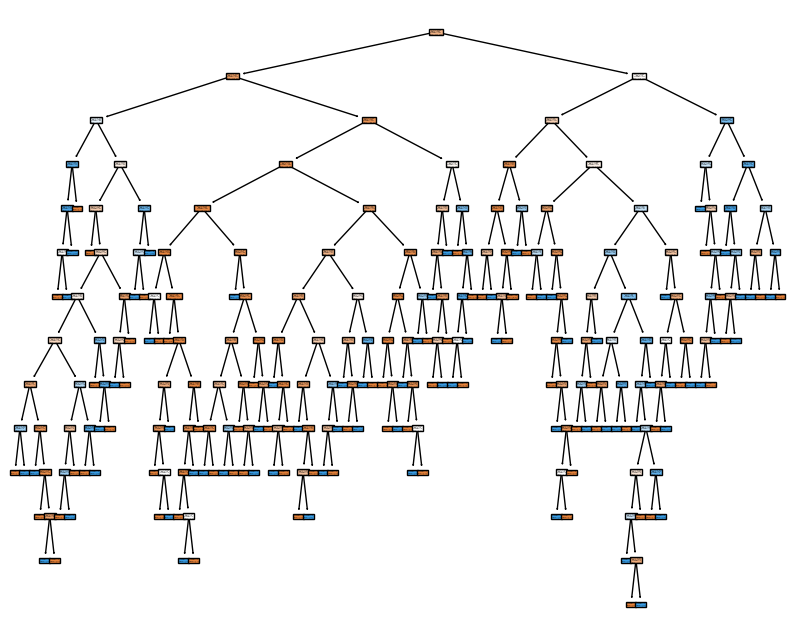

In [196]:
# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 8}
plt.show()

##Interview Questions

In [ ]:
##1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#Main Hyperparameters:

#Learning Rate: Controls how quickly the model learns from data.

#Batch Size: Number of samples used to update model parameters.

#Number of Epochs: Number of times the model sees the training data.

#Regularization: Prevents overfitting by adding a penalty term.

#Depth/Complexity: Number of layers or complexity of the model.
#Key Hyperparameters:

#max_depth: Maximum tree depth

#min_samples_split: Minimum samples to split a node

#min_samples_leaf: Minimum samples at a leaf node

#max_features: Maximum features to

#criterion: Splitting criterion (e.g., 'gini', 'entropy

In [ ]:
#2. What is the difference between the Label encoding and One-hot encoding?

#Label Encoding vs One-hot Encoding:

#Label Encoding: Assigns a unique integer to each category

#One-hot Encoding: Creates a new binary feature for each category

#Key Difference:

#Label encoding implies an order, while one-hot encoding does not.

    ##Both are used for converting catergorical columsn data into numerical.
